# Timoshenko Beam

## Strong form equations

The Timoshenko beam allows shear deformation and is valid for slender as well as for relatively short beams. In Timoshenko beam theory, planes normal to the beam axis remain plain but do not necessarily remain normal to the longitudinal axis. In other words, the rotation of the normal to the beam axis $\theta$ is not directly coupled to the first derivative of the deflection $\frac{dw}{dx}$. This assumption allows for shear deformation, where the shear strain $\gamma$ is a measure for how much the rotation of the plane normal to the beam axis with respect to the rotation of the beam axis itself. This is the first **kinematic relation** in Timoshenko beam theory: 


```{figure} figures/TimoshenkoDef.png
---
name: timoshenkoDef
height: 250 px
---
Kinematics of a Timoshenko beam
```



$$
\gamma = w_{,x} - \theta
$$(TS-KIN-gamma)

Is it apparent from Equation {eq}`TS-KIN-gamma` that assuming $\gamma$ to be equal to 0 implies a direct relation between $w$ and $\theta$ after which and only one unknown field remains: when $w(x)$ is known, $\theta$ follows, as is the case in the Euler-Bernouilli beam theory. In Timoshenko beam theory, however this is not the case. Shear deformation can be unequal to zero, and as a consequence $w$ and $\theta$ are independent fields. The two fields are coupled through the shear stiffness, but in the finite element formulation they will give rise to separate 'independent' degrees of freedom. 

The second kinematic relation is the one that defines the curvature. This is defined as the spatial derivative of $\theta$:

$$
\kappa = \theta_{,x}
$$ (TS-KIN-kappa)

Each strain-like quantity is related to a stress like quantity with a **constitutive relation**. For linear elastic response, these are

$$
M = -EI\kappa
$$ (TS-moment)

and

$$
V = GA_s\gamma
$$ (TS-shearforce)

where $EI$ and $GA_s$ combine material and geometric about the cross-section, and $GA_s$ accounts for uneven shear stress distribution through the effective shear area $A_s$. 

Finally, there are two **equilibrium relations**, one for rotational equilbrium 

$$
M_{,x} - V = 0
$$ (TS-EQ-rotation)

and one for translational equilibrium (in $y$-direction):

$$
V_{,x} + f_y = 0
$$ (TS-EQ-translation)

where $f_y$ is a distributed load.

Substitution of kinematic and constitutive relations in the equilibrium equations give the strong form equations for the Timoshenko beam:

$$
-EI\theta_{,xx}-GA_s\left(w_{,x}-\theta\right)=0 
$$ (TS-STRONG-eq1)

$$
GA_s\left(w_{,xx}-\theta_{,x}\right)+f_y=0
$$ (TS-STRONG-eq2)

which are two coupled second-order equations, over the domain $\Omega$. To formulate a well-posed problem, two boundary conditions are needed at each end of the domain, either moment or rotation needs to be prescribed, and either the deflection or the shear force. 

## Derivation of the weak form 

This problem differs from earlier problems in the sense that we have a two strong form equations. In order to derive a weak form, we need to multiply each of these with a weight function and integrate over the domain. We will use different symbols and let the choice of symbols be inspired by the type of equilibrium that they represent. The first, Equation {eq}`TS-STRONG-eq1` came from rotational equilibrium, and we will use the symbol for rotation with a bar, so $\bar{\theta}$ for the weight function. 

$$
- \int_{\Omega} \bar{\theta} EI \theta_{,xx} \: d\Omega - \int_{\Omega} \bar{\theta} GA_s (w_{,x} - \theta) \: d\Omega = 0
$$ (TS-WF-eq1)

The second, Equation {eq}`TS-STRONG-eq2` came from vertical equilibrium, and we use a symbol associated with the one for vertical displacements, $\bar{w}$:

$$
\int_{\Omega} \bar{w} GA_s (w_{,xx} - \theta_{,x}) \: d\Omega + \int_{\Omega} \bar{w} f_y \: d\Omega = 0
$$ (TS-WF-eq2)

Applying integrations by parts one terms with second derivatives gives:

$$
\int_{\Omega} \bar{\theta}_{,x} EI \theta_{,x} \: d\Omega - \int_{\Omega} \bar{\theta} GA_s (w_{,x} - \theta) \: d\Omega - \int_{\Gamma} \bar{\theta} EI \theta_{,x} n \: d\Gamma = 0
$$ (TS-WF-eq3)

$$
- \int_{\Omega} \bar{w}_{,x} GA_s (w_{,x} - \theta) \: d\Omega + \int_{\Gamma} \bar{w} GA_s (w_{,x} - \theta) n \: d\Gamma  + \int_{\Omega} \bar{w} f_y \: d\Omega = 0
$$ (TS-WF-eq4)

and then inserting the Neumann boundary conditions yields the weak form for a Timoshenko beam: find $w \in S_w$ and $\theta \in S_{\theta}$ such that

$$
\int_{\Omega} \bar{\theta}_{,x} EI \theta_{,x} \: d\Omega - \int_{\Omega} \bar{\theta} GA_s (w_{,x} - \theta) \: d\Omega = \int_{\Gamma_M} \bar{\theta} T \: d\Gamma
$$ (TS-WF-eq5)


$$
\int_{\Omega} \bar{w}_{,x} GA_s (w_{,x} - \theta) \: d\Omega = \int_{\Gamma_Q} \bar{w} F_y \: d\Gamma + \int_{\Omega} \bar{w} f_y \: d\Omega = 0
$$ (TS-WF-eq6)

A more precise definition of the necessary functions spaces should be provided to complete the problem. 



$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$

## Discrete Form 

The Galerkin problem for the Timoshenko beam involves finding 
$ w^h ∈ S_w^h $ and
$  \theta ^h  ∈ S_\theta^h  $
such that 

$$ \int_{\Omega} \bar{\theta}_{,x}^h EI \theta_{,x}^h  d\Omega
-\int_{\Omega} \bar{\theta}^h GA_s (\bar{w}_{,x}^h- \theta^h)  d\Omega = 
\int_{\Omega} \bar{\theta}^hT  d\Gamma
$$(TS-Galerkin1)


$$ \int_{\Omega} \bar{w}_{,x}^h GA_s ( w_{,x}^h - \theta^h) d\Omega =  
\int_{\Omega} \bar{w}^h f_y d\Omega + \int_{\Gamma_{Q}} \bar{w}^h F_y  d\Gamma
$$(TS-Galerkin2)

Representating the fields $w^h$ and $\theta^h$ and corresponding derivatives in terms of shape functions and nodal variables, we can write:

$$
w^h = \textbf{N}_w \textbf{a}_w
$$ (TS-w-discrete)

$$
\theta ^h  = \textbf{N}_\theta  \textbf{a}_\theta 
$$ (TS-th-discrete)

where we leave open the option of using different shape functions for the two fields $w$ and $\theta$. For the discretization of weight functions, we will use $\mathbf{N}_w$ also for $\bar{w}$ and $\mathbf{N}_\theta$ also for $\bar{\theta}$. 

$$
\bar{w}^h = \textbf{N}_w \textbf{c}_w 
$$ (TS-barw-discrete)

$$
\bar{\theta} ^h  = \textbf{N}_\theta  \textbf{c}_\theta 
$$ (TS-barth-discrete)

This may seem an arbitrary choice here. One thing that can be said in support of this choice is that it will ensure that the stiffness matrix is square and symmetric. A more physical argument in favor of this choice can be made when the finite element equations are derived from a virtual work equation instead of through the strong-form/weak-form recipe that we follow here.

Inserting the expressions for the unknown fields in terms of nodal variables and variations into Equations {eq}`TS-Galerkin1` and {eq}`TS-Galerkin2` and elimination of $\mathbf{c}_w$ and $\mathbf{c}_\theta$ leads to: 

$$  
\int_{\Omega_e}\textbf{B}_{\theta}^T ΕΙ \textbf{B}_\theta  d\Omega \textbf{a}_e^\theta+
\int_{\Omega_e}\textbf{N}_{\theta}^T GA_s \textbf{N}_\theta  d\Omega \textbf{a}_e^\theta -
\int_{\Omega_e}\textbf{N}_{\theta}^T GA_s \textbf{B}_w  d\Omega \textbf{a}_e^w =
\int_{\Gamma_{e,M}} \textbf{N}_{\theta}^T  Τ d\Gamma 
$$(TS-discrete-eq1)


$$
\int_{\Omega_e}\textbf{B}_{w}^T GA_s \textbf{B}_w  d\Omega \textbf{a}_e^w-
\int_{\Omega_e}\textbf{B}_{w}^T GA_s \textbf{N}_\theta  d\Omega \textbf{a}_e^\theta =
\int_{\Gamma_{e,Q}}\textbf{N}_{w}^T F_y  d\Gamma +
\int_{\Omega_e} \textbf{N}_{w}^T  f_y d\Omega
$$(TS-discrete-eq2)

This can be summarized as a single system of equations as:

$$ \begin{bmatrix}   \textbf{K}_{\theta\theta} & \textbf{K}_{\theta w} \\
  \textbf{K}_{w\theta} & \textbf{K}_{ww}  \\ \end{bmatrix}   \begin{bmatrix}   \textbf{a}_\theta \\ \textbf{a}_w \end{bmatrix}
  = \begin{bmatrix}   \textbf{f}_\theta \\ \textbf{f}_w \end{bmatrix}  
$$(TS-system)

where the components of the the element stiffness matrix are given by
$$ 
\textbf{K}_{\theta\theta} =  \int_{\Omega_e} \textbf{B}_{\theta}^T EI \textbf{B}_{\theta} + \textbf{N}_{\theta}^T G A_s \textbf{N}_{\theta} d\Omega 
$$ (TS-Ktt)
$$
 \textbf{K}_{\theta w} =  -\int_{\Omega_e} \textbf{N}_{\theta}^T G A_s \textbf{B}_{w} d\Omega  
 $$ (TS-Ktw)
$$
 \textbf{K}_{w\theta} =  -\int_{\Omega_e} \textbf{B}_{w}^T G A_s \textbf{N}_{\theta} d\Omega  
 $$ (TS-Kwt)
$$
 \textbf{K}_{ww} =  \int_{\Omega_e} \textbf{B}_{w}^T G A_s \textbf{B}_{w} d\Omega  
$$ (TS-Kww)

and components of the element RHS vector are given by 

$$
 \textbf{f}_{\theta}  = \int_{\Gamma_{e,Μ}} \textbf{N}_{\theta}^T T d\Gamma 
$$ (TS-ft)

$$
  \textbf{f}_{w} = \int_{\Gamma_{e,Q}} \textbf{N}_{w}^T  F_y d\Gamma + \int_{\Omega_e}\textbf{N}_{w}^T f_y  d\Omega  
$$ (TS-fw)

:::{card} Exercise
The resulting system of equations is symmetric. Can you make the argument why?
```{admonition} Solution
:class: tip, dropdown
The stiffness matrix $\mathbf{K}$ is symmetric if $\mathbf{K}^T=\mathbf{K}$. For the block matrix of Equation {eq}`TS-system`, this is the case if diagonal blocks are themselves symetric and if the off-diagonal blocks are each-other's transpose, so if
- $\mathbf{K}_{\theta\theta} = \mathbf{K}_{\theta\theta}^T$
- $\mathbf{K}_{ww} = \mathbf{K}_{ww}^T$
- $\mathbf{K}_{\theta w} = \mathbf{K}_{w\theta}^T$

That each of these three conditions is satisfied follows from the rule that for a matrix that the transpose of a matrix that is a product of two matrices is defined as $(\bA\bB)^T=(\bB^T\bA^T)$. The diagonal blocks have only terms that are defined as $\bA^T\bA$; matrices of this form will always be symmetric because

$$
\left(\bA^T\bA\right)^T = \bA^T\bA
$$

The off-diaginal blocks themselves are not symmetric, but are indeed each other's transpose as can be shown with the same rule:

$$
\left(\textbf{B}_{w}^T \textbf{N}_{\theta}\right)^T = \textbf{N}_\theta^T\textbf{B}_w
$$

The scalar factors $EI$ and $GA_s$ that appear in the stiffness matrix expressions do not affect the symmetry
```
:::


## Shear locking

An important aspect of the performance of Timoshenko beam elements is the concept of shear locking. The Timoshenko element formulation derived above behaves overly stiff when loaded in bending. 

```{admonition} Note
Shear locking is the effect that occurs in finite elments in which shear contribution to the energy does not vanish when they are deformed in pure bending, resulting in an overly stiff response with bending displacements that are smaller than they should be. The discretization error that appears in elements that suffer from shear locking vanishes extremely slowly upon mesh-refinement. Elements that suffer from shear locking are quadrilateral solid elements (particularly the 4-node version) and Timoshenko beam elements.
```

Consider a two-node Timoshenko beam of length $L$, with the same linear shape functions for displacement $w$ and rotation $\theta$. The components of the stiffness matrix are given by:

$$ \mathbf{K}^e_{\theta\theta} = \begin{bmatrix} \frac{EI}{L} + \frac{GA_sL}{3} & \frac{-EI}{L} + \frac{GA_sL}{6}  \\ \frac{-EI}{L} + \frac{GA_sL}{6} & \frac{EI}{L} + \frac{GA_sL}{3}   \end{bmatrix}$$

$$ \mathbf{K}^e_{\theta w} = \begin{bmatrix}  \frac{GA_s}{2} &  \frac{-GA_s}{2}  \\  \frac{GA_s}{2} &  \frac{-GA_s}{2}   \end{bmatrix}$$

$$ \mathbf{K}^e_{ww} = \begin{bmatrix} \frac{GA_s}{L} &  \frac{-GA_s}{L}  \\  \frac{-GA_s}{L} &  \frac{GA_s}{L}   \end{bmatrix}$$

Therefore, the stiffness matrix is of the form

$$ \mathbf{K}^e = \begin{bmatrix} \frac{EI}{L} + \frac{GA_sL}{3} &  \frac{-EI}{L} + \frac{GA_sL}{6} & \frac{GA_s}{2} &  \frac{-GA_s}{2}  \\
 \frac{-EI}{L} + \frac{GA_sL}{6} &   \frac{EI}{L} + \frac{GA_sL}{3}  & \frac{GA_s}{2} &  \frac{-GA_s}{2} \\
  \frac{GA_s}{2} &  \frac{GA_s}{2}  & \frac{GA_s}{L} &  \frac{-GA_s}{L}  \\
  \frac{-GA_s}{2} &  \frac{-GA_s}{2}  &  \frac{-GA_s}{L} &  \frac{GA_s}{L}\\
  \end{bmatrix}$$



If the one end of the element (node 1) is fixed, so that $w_1=\theta_1=0$ and a shear load $F_y$ is applied at the other end (node 2), the resulting two-degree-of-freedom problem is:


$$ \begin{bmatrix} \frac{EI}{L} + \frac{GA_sL}{3} &  \frac{-GA_s}{2}  \\
  \frac{-GA_s}{2} &  \frac{GA_s}{L}   \end{bmatrix}  \begin{bmatrix}   \theta_2 \\ w_2 \end{bmatrix} = \begin{bmatrix}   0 \\ F_y \end{bmatrix} 

$$

Finally, the solution for the displacement $w_2$ is 

$$ w_2 = \frac{F_y( \frac{EI}{L} + \frac{GA_sL}{3} ) } {\frac{EIGA_s}{L^2}+\frac{G^2A_s^2}{12}}   $$



Two limit states can now be identified: 

- For $L \rightarrow 0$ : $ w_2 \approx \frac {PL}{GA_s} $ 
- For $L \rightarrow \infty$ : $ w_2 \approx \frac {4 PL}{G A_s} $

The shear-dominated response for $L\rightarrow0$ is the exact solution for a shear beam. The slender limit of $L\rightarrow\infty$, however, is not correct. For finite $EI$ and $GA_s$, at $L\rightarrow\infty$, the beam response should be bending-dominated and the classical cantilever beam solution $w=\frac{PL^3}{3EI}$ should be obtained. Even with an extremely fine mesh, this element will exhibit a very stiff response.

The stiffness matrix above can be obtained by analytical evaluation of the integrals in the element stiffness definition, or by using 2-point Gauss integration. For the case of **one-point numerical integration**, the integrals are not evaluated exaclty, but it turns out that this helps to remove the locking. With a single integration point at the center of the element, the stiffness matrix becomes:

$$ \mathbf{K}^e = \begin{bmatrix} \frac{EI}{L} + \frac{GA_sL}{4} &  \frac{-EI}{L} + \frac{GA_sL}{4} & \frac{GA_s}{2} &  \frac{-GA_s}{2}  \\
 \frac{-EI}{L} + \frac{GA_s}{4} &   \frac{EI}{L} + \frac{GA_sL}{4}  & \frac{GA_s}{2} &  \frac{-GA_s}{2} \\
  \frac{GA_s}{2} &  \frac{GA_s}{2}  & \frac{GA_s}{L} &  \frac{-GA_s}{L}  \\
  \frac{-GA_s}{2} &  \frac{-GA_s}{2}  &  \frac{-GA_s}{L} &  \frac{GA_s}{L}\\
  \end{bmatrix}$$

<div class="alert alert-block alert-success">
<b>Exercise:</b>  
Perform 1-point numerical integration by hand to check the result above
</div>

Now, for the load case of a single element, fixed at one end, the displacement is given as:


$$ w_2 = \frac{F_y( \frac{EI}{L} + \frac{GA_sL}{4} ) } {\frac{EIGA_s}{L^2}}   $$


And the limit states change as follows: 

- For $L \rightarrow 0$ : $ w_2 \approx \frac {PL}{GA_s} $ 
- For $L \rightarrow \infty$ : $ w_2 \approx \frac {PL^3}{4EI} $

It can be observed that the shear beam limit is still exact while the nature of the slender beam limit solution is completely change. While it was incorrectly dominated by $GA_s$ before, it now only has $EI$, it looks very much like the classical beam solution, except that the factor $\frac13$ from the exact solution is $\frac14$ in the finite element solution. This difference is due to the fact that we are analyzing a cantilever beam with linearly varying moment with a single finite element. A single finite element is not enough to describe this scenario exactly, but if we would refine the mesh, the solution would approach the exact solution quite quickly. 

```{admonition} Uniform or selective reduced integration
Upon closer inspection of the element, it can be shown that the element performance improves if the shear terms those that have $GA_s$ inside them are under-integrated with a single integration point. Coincidentally, the only term in the stiffness matrix that needed two integration points in the first place is the $\mathbf{N}^TGA_s\mathbf{N}$-term in $\mathbf{K}_{\theta\theta}$. The $EI$-related term in $\mathbf{K}_{\theta\theta}$ needs only one integration point to be integrated exactly. As a consequence complete under-integration does not give rise to new problems. This is different from the 4-node quadrilateral element, where under-integration also removes shear locking but causes so-called *hour-glassing*. To get a well-behaved locking-free 4-node element, *selective reduced integration* needs to be applied, where shear terms are integrated differently from other terms. The Timoshenko beam element, *uniform reduced integration* is a solution to the problem without side-effects. 
```

An alternative solution is to use different orders of interpolation. An element with quadratic shape functions for $w$ and linear shape functions for $\theta$ does not suffer from shear locking even when fully integrated. 



## Timoshenko plot Gauss2 integration

### Element matrix and vector

#### N-vector
We need two different N-vectors:
- w
- theta

In [57]:
# Returns the evaluated N matrix
# - The local coordinate of evaluation "x_local"
# - The element size "dx"
def evaluate_N(x_local, dx):
    return np.array([[1-x_local/dx, x_local/dx]])

#### B-vector
We need two different B-vectors:
- w
- theta

In [58]:
# Returns the evaluated B vector
# - The local coordinate of evaluation "x_local"
# - The element size "dx"
def evaluate_B(x_local, dx):
    return np.array([[-1/dx, 1/dx]])

#### Element K-matrix

In [59]:
# Returning the element matrix of K
# - The bending stiffness of the rod "EI"
# - The shear stiffness of the rod "GA_s"
# - The length of an element "dx"

def get_K_element_matrix(EI, GA_s, dx):
    
    # Defining integration locations and weights
    integration_locations = [(dx - dx/(3**0.5))/2, (dx + dx/(3**0.5))/2]
    integration_weights = [dx/2, dx/2]
    n_ip = len(integration_weights)

    # Setting up the K submatrices
    n_node = 2
    K_thetatheta = np.zeros((n_node,n_node))
    K_thetaw = np.zeros((n_node,n_node))
    K_wtheta = np.zeros((n_node,n_node))
    K_ww = np.zeros((n_node,n_node))

    # Evaluation of the matrix in a loop over integration points
    for x_ip, w_ip in zip(integration_locations, integration_weights):
        B = evaluate_B(x_ip, dx)
        N = evaluate_N(x_ip, dx)
        K_thetatheta += EI*np.dot(np.transpose(B), B)*w_ip + GA_s*np.dot(np.transpose(N), N)*w_ip
        K_thetaw += -GA_s*np.dot(np.transpose(N), B)*w_ip
        K_wtheta += -GA_s*np.dot(np.transpose(B), N)*w_ip
        K_ww += GA_s*np.dot(np.transpose(B), B)*w_ip

    # Create the 4x4 element matrix by arranging the submatrices
    K_e = np.vstack((np.hstack((K_thetatheta, K_thetaw)),
                     np.hstack((K_wtheta, K_ww))))
    
    K_new = K_e.copy()
    K_new[1], K_new[2] = K_e[2], K_e[1]
    K_new[:, [1, 2]] = K_new[:, [2, 1]]

    return K_new

In [60]:
#Test analytical solution for 1 element
dx = 10
EI = 2e4
GA_s = 1e5
 
K = get_K_element_matrix(EI, GA_s, dx)

f = np.array([0,0,0,1]).T

# Constrain K
K_c = np.delete(K, [0, 1], axis=0)
K_c2 = np.delete(K_c, [0, 1], axis=1)

# Constrain f of the system:
f_c = np.delete(f, [0, 1])

K_inv = np.linalg.inv(K_c2)
u = np.dot(K_inv,f_c)

print(u)

[5.8593750e-05 3.9296875e-04]


### Element force vector

In [61]:
# Returning the force vector of a single element
# - The magnitude of the applied moment "T"
# - The magnitude of the distributed load "f_y"
# - The magnitude of the applied shear force "F_y"

# - The length of the element "dx"
def get_element_force(T, F_y, f_y, dx):
    # Creating a matrix with the required size
    n_node = 2
    N = np.zeros((1,n_node))    # Defining in 2 dimensions is nessecary for transpose
    
    # Defining integration locations and weights
    integration_locations = [(dx - dx/(3**0.5))/2, (dx + dx/(3**0.5))/2]
    integration_weights = [dx/2, dx/2]
    
    # Setting up the local element force vector
    f_theta = np.zeros((n_node,1))
    f_w = np.zeros((n_node,1))
    
    for x_ip, w_ip in zip(integration_locations, integration_weights):
        N = evaluate_N(x_ip,dx)
        f_theta += np.transpose(N)*T*w_ip
        f_w += np.transpose(N)*F_y*w_ip + np.transpose(N)*f_y
    
    # Create the force element matrix by arranging the submatrices
    f_e = np.vstack((f_theta, f_w))
    
    # Interchange the values of f_e
    f_e[1], f_e[2] = f_e[2], f_e[1]
    
    return f_e

### Global matrix and vector

#### Global K-matrix

In [62]:
def get_nodes_for_element(ie):
    return np.array([ie * 2, ie * 2 + 1, ie * 2 + 2, ie * 2 + 3])

In [63]:
# - The length of the rod "rod_length"
# - The number of elements "n_el"
# - The bending stiffness of the rod "EI"
# - The shear stiffness of the rod "GA_s"
def assemble_global_K(rod_length, n_el, EI, GA_s):
    n_DOF = (n_el-1)*2 + 4
    dx = rod_length/n_el
    K_global = np.zeros((n_DOF, n_DOF))
    
    for i in range(n_el):
        elnodes = get_nodes_for_element(i)
        K_global[np.ix_(elnodes,elnodes)] += get_K_element_matrix(EI, GA_s, dx)

    return K_global

#### Global force matrix

In [64]:
# Returns the global f vector with continuous forces on a rod
# - The length of the rod "rod_length"
# - The number of elements "n_el"
# - The magnitude of the applied moment "T"
# - The magnitude of the distributed load "f_y"
# - The magnitude of the applied shear force "F_y"
def assemble_global_f(rod_length, n_el, T, F_y, f_y):
    n_DOF = (n_el-1)*2 + 4
    dx = rod_length/n_el
    f_global = np.zeros((n_DOF,1))
    
    for i in range(n_el):
        elnodes = get_nodes_for_element(i) 
        f_global[elnodes] += get_element_force(T, F_y, f_y, dx)
        
    return np.squeeze(f_global)

### Boundary conditions and plotting

In [65]:
def simulate(n_element):
    length = 10           # Length
    EI = 2e4                # Bending stiffness
    GA_s = 1e5              # Shear stiffness
    n_node = n_element + 1  # Number of nodes
    F_right = 1             # Load applied at the right boundary
    a_left = 0              # Displacement at the left boundary
    f_y = 0                 # Distributed load
    T = 0                   # Applied moment
    F_y = 0                 # Applied shear load  
    
    dx = length/n_element
    
    x = np.linspace(0,length,n_node)

    # Assmemble K for the rod problem
    K = assemble_global_K(length, n_element, EI, GA_s)
  
    # Assemble f first with distributed load only
    f = assemble_global_f(length, n_element, T, F_y, f_y)

    # Add boundary conditions to f
    f[-1] = F_right

    #Constrain K of the system:
    # Remove the 1st and 3rd rows
    K = np.delete(K, [0,1], axis=0)
    # Remove the 1st and 2nd columns
    K = np.delete(K, [0,1], axis=1)
    
    # Constrain f of the system:
    f = np.delete(f, [0, 1])

    K_inv = np.linalg.inv(K)
    
    a = np.dot(K_inv, f)
    a = np.append([0,0],a)

    return x, a

In [66]:
x, a = simulate(10)
    
# Separate theta and w values
theta = a[0::2]         # Select every 1st value starting from index 0
w = a[1::2]             # Select every 2nd value starting from index 1
print(f'1 element code gives: w[-1] = {w[-1]:.3e}')

L = 10                  # Length
EI = 2e4                # Bending stiffness
GA_s = 1e5              # Shear stiffness
f_y = 0                 # Distributed load
T = 0                   # Applied moment
F_y = 1
print(f'1 element analytical solution: w[-1] = {F_y*(EI/L + GA_s*L/3)/(EI*GA_s/L**2 + GA_s**2/12):.3e}')

print(f'Limit for L to 0: w[-1] = {F_y*L/GA_s}')
print(f'Limit for L to inf: w[-1] = {4*F_y*L/GA_s}')

1 element code gives: w[-1] = 1.184e-02
1 element analytical solution: w[-1] = 3.930e-04
Limit for L to 0: w[-1] = 0.0001
Limit for L to inf: w[-1] = 0.0004


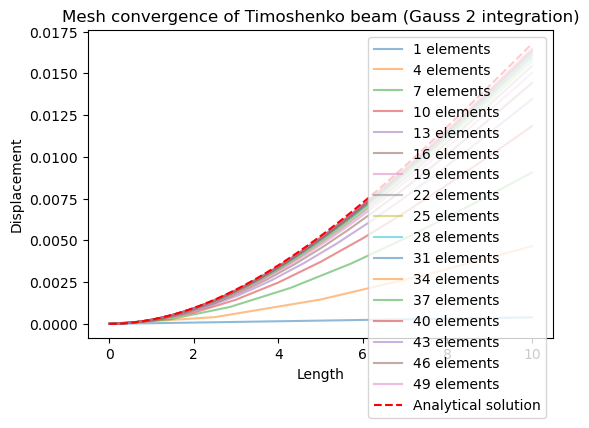

In [67]:
import numpy as np
import matplotlib.pyplot as plt

number_elements = 50
plt.figure(figsize=(6,4))

n = np.arange(1, number_elements+1, 3)
for i in range(len(n)):
    x, a = simulate(n[i])
    
    # Separate theta and w values
    theta = a[0::2]  # Select every 1st value starting from index 0
    w = a[1::2]     # Select every 2nd value starting from index 1
    plt.plot(x,w, label= f'{n[i]} elements', alpha=0.5)
   
x = np.linspace(0,10,100)
w_analytical = - F_y * (x - L)/GA_s - F_y*x/(2*EI)*(L**2-x**2/3) + 1/3*F_y*L**3/EI
w_ana = w_analytical[::-1]
plt.plot(x, w_ana, label='Analytical solution', c='r', linestyle='--')

plt.title('Mesh convergence of Timoshenko beam (Gauss 2 integration)')
plt.xlabel('Length')
plt.ylabel('Displacement')
plt.legend(loc='best');

In [68]:
number_elements = 50

n = np.arange(1, number_elements+1, 1)
w_2gauss = np.zeros(len(n))
for i in range(len(n)):
    x, a = simulate(n[i])
    w_2gauss[i] = a[-1]

x = 0
w_analytical = - F_y * (x - L)/GA_s - F_y*x/(2*EI)*(L**2-x**2/3) + 1/3*F_y*L**3/EI

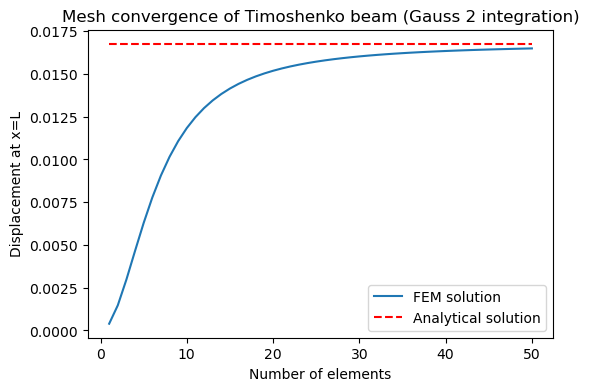

In [69]:
plt.figure(figsize=(6,4))
plt.plot(n, w_2gauss, label='FEM solution')
plt.title('Mesh convergence of Timoshenko beam (Gauss 2 integration)')
plt.plot([np.min(n), np.max(n)], [w_analytical, w_analytical], c='r', linestyle='--', label='Analytical solution')
plt.xlabel('Number of elements')
plt.ylabel('Displacement at x=L')
plt.legend(loc='best');

In [70]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

# Colors
grey = '#eeeeee' # light grey fill

## Prepare all the graphs that are to be plotted
# Define the range of densities to plot
range_elements = np.arange(1, 40, 1)
n_element = np.max(range_elements)

## Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

length = 10           # Length
EI = 2e4                # Bending stiffness
GA_s = 1e5              # Shear stiffness
n_node = n_element + 1  # Number of nodes
F_right = 1             # Load applied at the right boundary
a_left = 0              # Displacement at the left boundary
f_y = 0                 # Distributed load
T = 0                   # Applied moment
F_y = 1                 # Applied shear load  


x_analytical = np.linspace(0, length, 1000)
w_analytical = - F_y * (x_analytical - length)/GA_s - F_y*x_analytical/(2*EI)*(length**2-x_analytical**2/3) + 1/3*F_y*length**3/EI
u_analytical = w_analytical[::-1]

# Add traces, one for each slider step
for a in range_elements: 
    x, u  = simulate(a)
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_analytical,
            y=u_analytical,
            line=dict(color='#FFA500'),
            mode='lines',
            name='Exact solution'))
    fig.add_trace(        
        go.Scatter(
            visible=False,
            x=x,
            y=u[1::2],
            line=dict(color='#6a8ba4'),
            mode='lines',
            name='FE solution'))

traces_per_step = 2 # Number of traces per value of a

# Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 1
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

# Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=str(round(range_elements[i], 1))
    )
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": r"Number of elements: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(title_text='x (m)', range=[-0.1, 10.1])

# Update yaxis properties
fig.update_yaxes(title_text='w (m)', range=[-0.005, 0.02])

fig.update_layout(
    title="Displacement of Timoshenko beam (Gauss 2)",
    sliders=sliders,
    legend_title="Legend"
)

## Timoshenko plot Gauss 1 integration

In [71]:
# Returning the element matrix of K
# - The bending stiffness of the rod "EI"
# - The shear stiffness of the rod "GA_s"
# - The length of an element "dx"

def get_K_element_matrix(EI, GA_s, dx):
    
    # Defining integration locations and weights
    integration_locations = [dx/2]
    integration_weights = [dx]
    n_ip = len(integration_weights)

    # Setting up the K submatrices
    n_node = 2
    K_thetatheta = np.zeros((n_node,n_node))
    K_thetaw = np.zeros((n_node,n_node))
    K_wtheta = np.zeros((n_node,n_node))
    K_ww = np.zeros((n_node,n_node))

    # Evaluation of the matrix in a loop over integration points
    for x_ip, w_ip in zip(integration_locations, integration_weights):
        B = evaluate_B(x_ip, dx)
        N = evaluate_N(x_ip, dx)
        K_thetatheta += EI*np.dot(np.transpose(B), B)*w_ip + GA_s*np.dot(np.transpose(N), N)*w_ip
        K_thetaw += -GA_s*np.dot(np.transpose(N), B)*w_ip
        K_wtheta += -GA_s*np.dot(np.transpose(B), N)*w_ip
        K_ww += GA_s*np.dot(np.transpose(B), B)*w_ip

    # Create the 4x4 element matrix by arranging the submatrices
    K_e = np.vstack((np.hstack((K_thetatheta, K_thetaw)),
                     np.hstack((K_wtheta, K_ww))))
    
    K_new = K_e.copy()
    K_new[1], K_new[2] = K_e[2], K_e[1]
    K_new[:, [1, 2]] = K_new[:, [2, 1]]

    return K_new

In [72]:
# Returning the force vector of a single element
# - The magnitude of the applied moment "T"
# - The magnitude of the distributed load "f_y"
# - The magnitude of the applied shear force "F_y"

# - The length of the element "dx"
def get_element_force(T, F_y, f_y, dx):
    # Creating a matrix with the required size
    n_node = 2
    N = np.zeros((1,n_node))    # Defining in 2 dimensions is nessecary for transpose
    
    # Defining integration locations and weights
    integration_locations = [dx/2]
    integration_weights = [dx]
    
    # Setting up the local element force vector
    f_theta = np.zeros((n_node,1))
    f_w = np.zeros((n_node,1))
    
    for x_ip, w_ip in zip(integration_locations, integration_weights):
        N = evaluate_N(x_ip,dx)
        f_theta += np.transpose(N)*T*w_ip
        f_w += np.transpose(N)*F_y*w_ip + np.transpose(N)*f_y
    
    # Create the force element matrix by arranging the submatrices
    f_e = np.vstack((f_theta, f_w))
    
    # Interchange the values of f_e
    f_e[1], f_e[2] = f_e[2], f_e[1]
    
    return f_e

In [73]:
x, a = simulate(1)
    
# Separate theta and w values
theta = a[0::2]         # Select every 1st value starting from index 0
w = a[1::2]             # Select every 2nd value starting from index 1
print(f'1 element code: w[-1] = {w[-1]:.3e}')

L = 10                  # Length
EI = 2e4                # Bending stiffness
GA_s = 1e5              # Shear stiffness
f_y = 0                 # Distributed load
T = 0                   # Applied moment
F_y = 1

print(f'1 element analytical: w[-1] = {F_y*(EI/L + GA_s*L/4)/(EI*GA_s/L**2):.3e}')
print(f'Limit for L to 0: {F_y*L/GA_s}')
print(f'Limit for L to inf: {F_y*L**3/(4*EI)}')

1 element code: w[-1] = 1.260e-02
1 element analytical: w[-1] = 1.260e-02
Limit for L to 0: 0.0001
Limit for L to inf: 0.0125


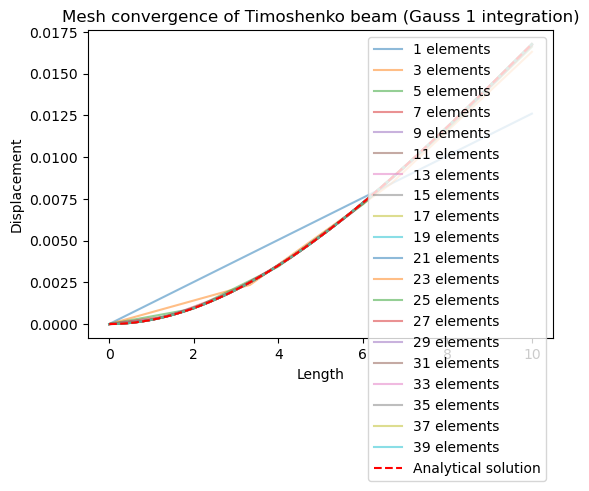

In [74]:
number_elements = 40
plt.figure(figsize=(6,4))

n = np.arange(1, number_elements+1, 2)
for i in range(len(n)):
    x, a = simulate(n[i])
    
    # Separate theta and w values
    theta = a[0::2]  # Select every 1st value starting from index 0
    w = a[1::2]     # Select every 2nd value starting from index 1
    plt.plot(x,w, label= f'{n[i]} elements', alpha=0.5)
    
x = np.linspace(0,10,100)
w_analytical = - F_y * (x - L)/GA_s - F_y*x/(2*EI)*(L**2-x**2/3) + 1/3*F_y*L**3/EI
w_ana = w_analytical[::-1]
plt.plot(x, w_ana, label='Analytical solution', c='r', linestyle='--')

plt.title('Mesh convergence of Timoshenko beam (Gauss 1 integration)')
plt.xlabel('Length')
plt.ylabel('Displacement')
plt.legend(loc='best');

In [75]:
number_elements = 50
n = np.arange(1, number_elements+1, 1)

w_1gauss = np.zeros(len(n))
for i in range(len(n)):
    x, a = simulate(n[i])
    w_1gauss[i] = a[-1]

x = 0
w_analytical = - F_y * (x - L)/GA_s - F_y*x/(2*EI)*(L**2-x**2/3) + 1/3*F_y*L**3/EI

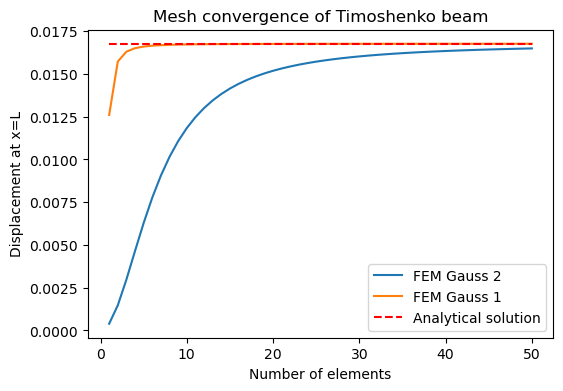

In [76]:
plt.figure(figsize=(6,4))
plt.plot(n, w_2gauss, label='FEM Gauss 2')
plt.plot(n, w_1gauss, label='FEM Gauss 1')
plt.title('Mesh convergence of Timoshenko beam')
plt.plot([np.min(n), np.max(n)], [w_analytical, w_analytical], c='r', linestyle='--', label='Analytical solution')
plt.xlabel('Number of elements')
plt.ylabel('Displacement at x=L')
plt.legend(loc='best');

In [80]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

# Colors
grey = '#eeeeee' # light grey fill

## Prepare all the graphs that are to be plotted
# Define the range of densities to plot
range_elements = np.arange(1, 9, 1)
n_element = np.max(range_elements)

## Create plot
fig = go.Figure()

base_traces = 0 # Number of traces that are always visible

length = 10           # Length
EI = 2e4                # Bending stiffness
GA_s = 1e5              # Shear stiffness
n_node = n_element + 1  # Number of nodes
F_right = 1             # Load applied at the right boundary
a_left = 0              # Displacement at the left boundary
f_y = 0                 # Distributed load
T = 0                   # Applied moment
F_y = 1                 # Applied shear load  


x_analytical = np.linspace(0, length, 1000)
w_analytical = - F_y * (x_analytical - length)/GA_s - F_y*x_analytical/(2*EI)*(length**2-x_analytical**2/3) + 1/3*F_y*length**3/EI
u_analytical = w_analytical[::-1]

# Add traces, one for each slider step
for a in range_elements: 
    x, u  = simulate(a)
    fig.add_trace(  
        go.Scatter(
            visible=False,
            x=x_analytical,
            y=u_analytical,
            line=dict(color='#FFA500'),
            mode='lines',
            name='Exact solution'))
    fig.add_trace(        
        go.Scatter(
            visible=False,
            x=x,
            y=u[1::2],
            line=dict(color='#6a8ba4'),
            mode='lines',
            name='FE solution'))

traces_per_step = 2 # Number of traces per value of a

# Show the traces for one value of a when loading the plot (initial setup)
active_a_index = 1
for i in range(traces_per_step):
    curr_idx = int(base_traces + active_a_index*traces_per_step + i)
    fig.data[curr_idx].visible = True

# Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):
    visarray = [False] * len(fig.data)
    visarray[0:base_traces] = [True] * base_traces
    curr_idx = int(base_traces + i * traces_per_step)
    next_idx = int(base_traces + (i+1) * traces_per_step)
    visarray[curr_idx:next_idx] = [True] * traces_per_step
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=str(round(range_elements[i], 1))
    )
    steps.append(step)

sliders = [dict(
    active=active_a_index,
    currentvalue={"prefix": r"Number of elements: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    legend_title="Legend",
)

fig.update_xaxes(title_text='x (m)', range=[-0.1, 10.1])

# Update yaxis properties
fig.update_yaxes(title_text='w (m)', range=[-0.005, 0.02])

fig.update_layout(
    title="Displacement of Timoshenko beam (Gauss 1)",
    sliders=sliders,
    legend_title="Legend"
)

fig